In [59]:

#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report
  

#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix


## 1- Importing Churn DATASET

In [60]:
#Import the dataset--------------------------------------------------------

dataset = pd.read_csv('churn.csv')


In [61]:
# Evaluate Datastructure --------------------------------------------------------

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### A quick describe method reveals that the telecom customers are staying on average for 32 months and are paying "$64" per month. However, this could potentially be because different customers have different contracts.

In [64]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### From the look of it, we can presume that the dataset contains several numerical and categorical columns providing various information on the customer transactions

## 2- Preprare and pre-process the data;

### Data cleaning

## Missing values

In [65]:
missing_val=["N/a","na","?"," ",np.nan] #list of missing values representation
dataset =  pd.read_csv('churn.csv',sep = ',', na_values=missing_val) # read the table and consider than the list of missing_val a N/A values

dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 11 missing values detected in the attributes "TotalCharges"

In [66]:
TotalCharges_mean=dataset["TotalCharges"].mean()
dataset["TotalCharges"]= dataset["TotalCharges"].fillna(TotalCharges_mean)


In [67]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###  after replacing the missing values by the mean of the column we have no missing values

In [68]:
# Check Target Variable Distribution ----------------------------------------------- 

dataset["Churn"].value_counts()



No     5174
Yes    1869
Name: Churn, dtype: int64

### the data set is imbalanced with a high proportion of active customers compared to their churned counterparts.

In [69]:

#TotalCharges it is numerical form but type Object 


dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')

dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")



In [70]:

# label Encode Binary data
#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))


6 columns were label encoded.


### Here we are label encoding all categorical variables that have only two unique values. Any categorical variable that has more than two unique values are dealt with Label Encoding and one-hot Encoding in the subsequent sections.

##  the histograms for numerical variables:


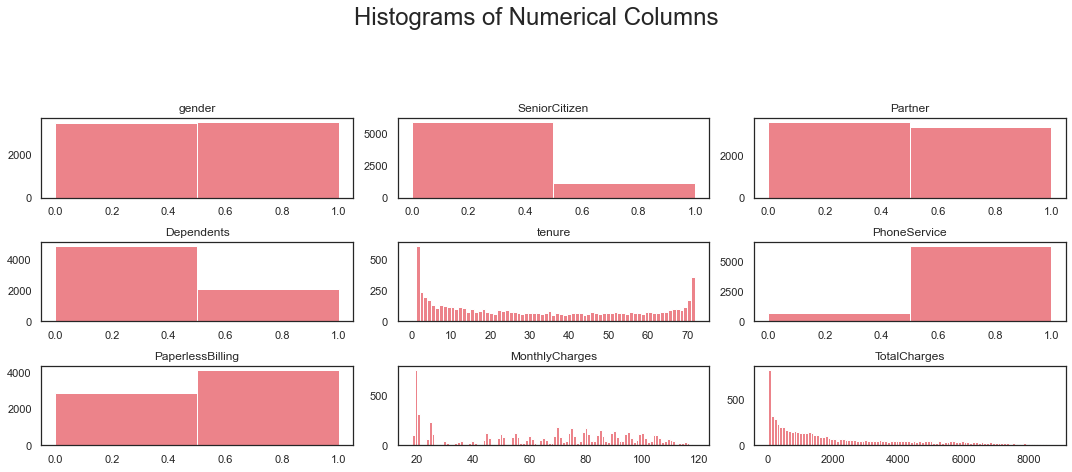

In [71]:
  
dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



#### Gender distribution shows that the dataset features a relatively equal proportion of male and female customers. Almost half of the customers in our dataset are female whilst the other half are male.


## the distribution of categorical variables:

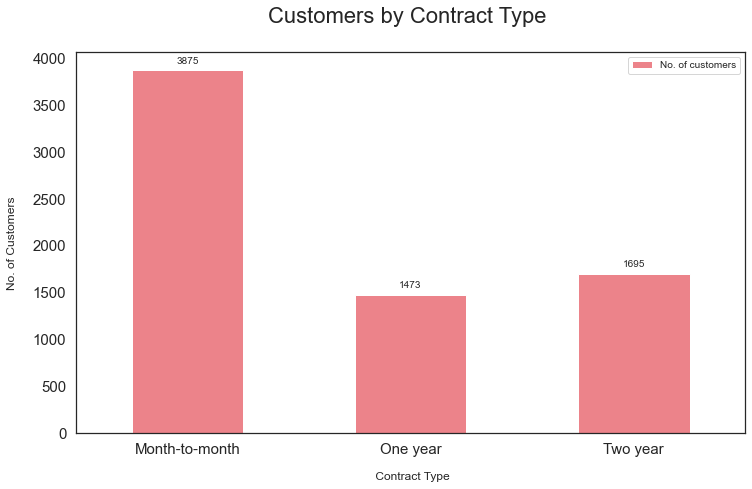

In [72]:

 
    
#(1) Distribution of Contract Type----------------------------------------------------------------------------------------

contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)


#### Most of the customers seem to have a prepaid connection with the telecom company. On the other hand, there are a more or less equal proportion of customers in the 1-year and 2-year contracts.

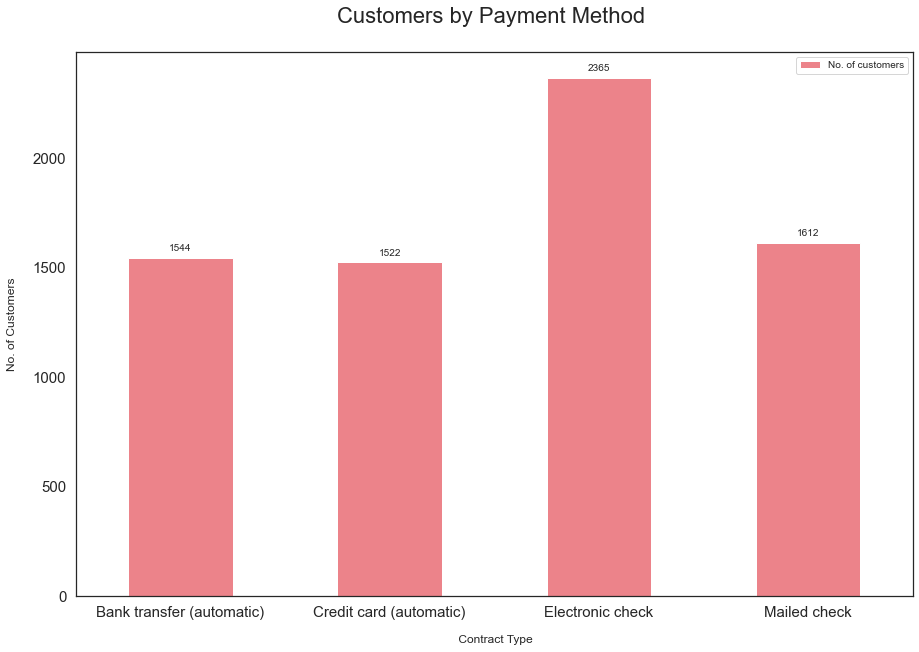

In [73]:

#(2) Distribution of Payment Method Type---------------------------------------------------------------------------------------

payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False,  subplots = False,  figsize =(15, 10), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                                                             
add_value_labels(ax)


#### The dataset indicates that customers prefer to pay their bills electronically the most followed by bank transfer, credit card and mailed checks.

## Distribution of label encoded categorical variables:

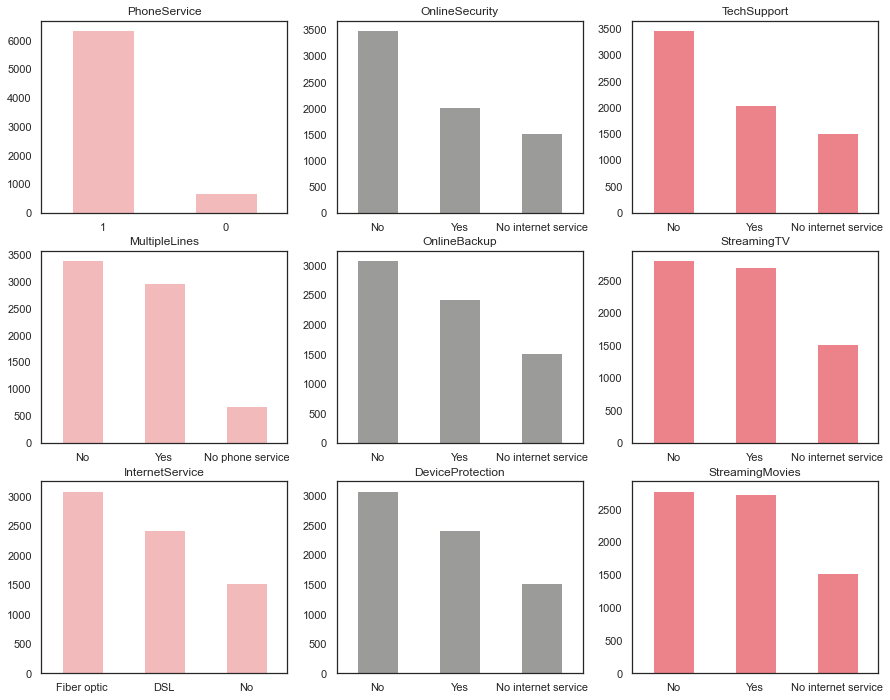

In [74]:

#(3) Distribution of various Label Encoded Categorical Variables---------------------------------------------------------------------------------------

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)


### Most of the customers have phone service out of which almost half of the customers have multiple lines.

### 3/4th of the customers have opted for internet service via Fiber Optic and DSL connections with almost half of the internet users subscribing to streaming TV and movies.

### Customers who have availed Online Backup, Device Protection, Technical Support and Online Security features are a minority.

## Data reduction

In [75]:

#  Find positive and negative correlations with the Response Variable--------------------

dataset2 = dataset[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199428
tenure         -0.352229
dtype: float64


### Interestingly, the churn rate increases with monthly charges and age. In contrast Partner, Dependents and Tenure seem to be negatively related to churn

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

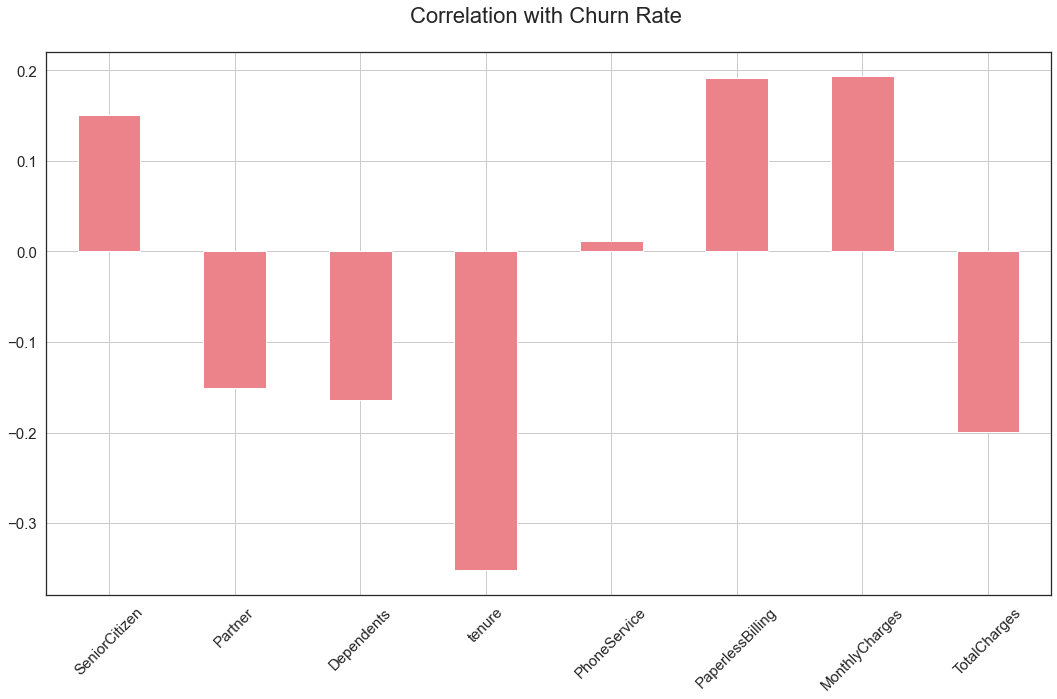

In [76]:

# Plot positive & negative correlation with Response Variable-----------------------------

correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), fontsize = 15, color = '#ec838a',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")


<AxesSubplot:>

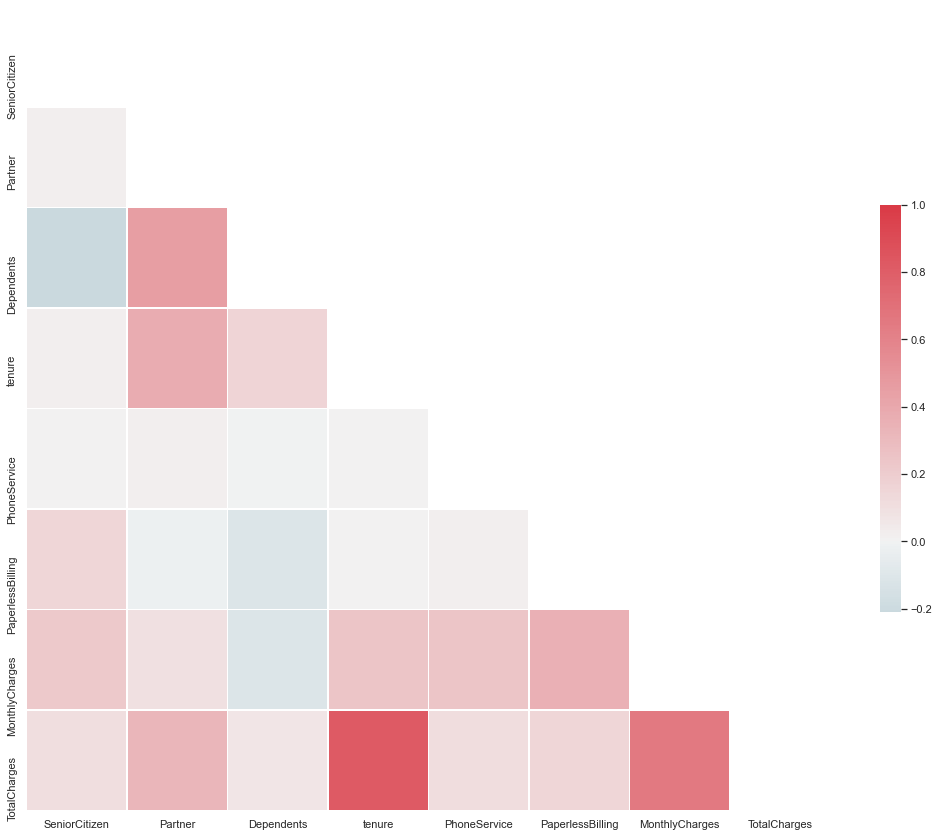

In [77]:


# Plot Correlation Matrix of all independent variables------------------------

## Set and compute the Correlation Matrix
sn.set(style="white")
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



Text(0.5, 1.0, 'Co-linearity of Monthly Charges and Total Charges \n')

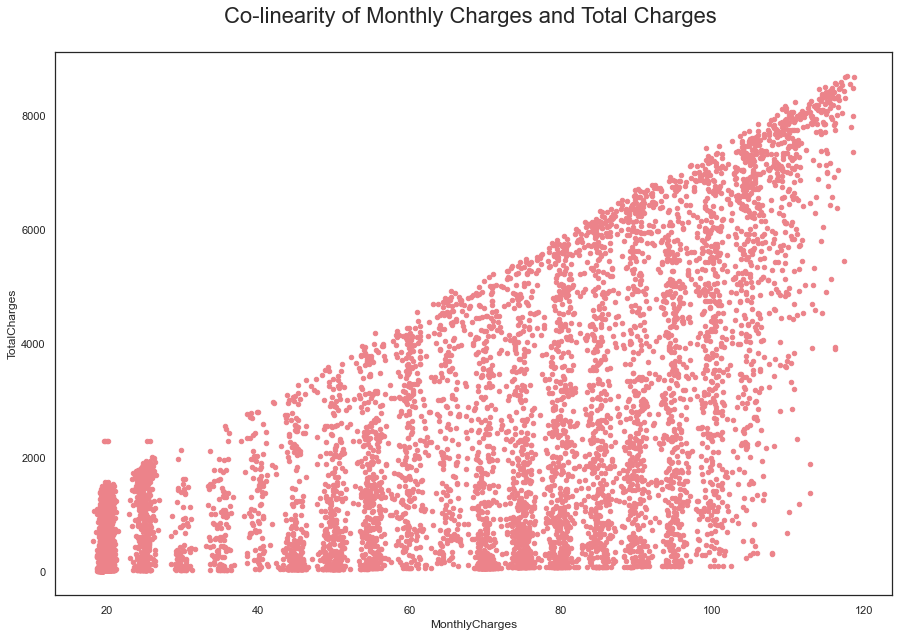

In [78]:
#Total Charges seem to be colinear with Monthly Charges.

#check colinearity:
    
dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15, 10), x = 'MonthlyCharges',
                                                              y='TotalCharges', color =  '#ec838a')


plt.title('Co-linearity of Monthly Charges and Total Charges \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")



### we need to drop one of the correlated features to see if it help us in bringing down the multicollinearity between correlated features

In [79]:
#Applying changes in the main dataset:
    
dataset = dataset.drop(columns = "TotalCharges")  


In [80]:
#Step 10: Encode Categorical data----------------------------------------------------------------

#Incase if user_id is an object:
    
identity = dataset["customerID"]

dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy

dataset= pd.get_dummies(dataset)

#Rejoin userid to dataset (column concatenation)

dataset = pd.concat([dataset, identity], axis = 1)
 

In [81]:
# Split dataset into dependent and independent variables-----------------------------------

#identify response variable:
    
y = dataset["Churn"]

X = dataset.drop(columns="Churn")


### 3- Choose a classification technique together with two different techniques that handle imbalanced data sets to compare;


In [82]:
# Generate training and test datasets of dependent and independent variables-----------------


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (5634, 40)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 40)
Number transactions y_test dataset:  (1409,)


In [83]:

# Removing Identifiers-------------------------------------------------------------------

train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])



### Data transformation

In [84]:
# Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2


##  Resampling Techniques — Oversample minority class
Our next method begins our resampling techniques.
Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

In [85]:
from sklearn.utils import resample




# concatenate our training data back together
X_RT = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_churn = X_RT[X_RT.Churn==0]
churn_ =X_RT[X_RT.Churn==1]

# upsample minority
churn_upsampled = resample(churn_,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled.Churn.value_counts()



0    4139
1    4139
Name: Churn, dtype: int64

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 1}
Résultats de la validation croisée :
accuracy = 0.858 (+/-0.022) for {'n_neighbors': 1}
accuracy = 0.769 (+/-0.021) for {'n_neighbors': 5}
accuracy = 0.765 (+/-0.022) for {'n_neighbors': 10}
accuracy = 0.759 (+/-0.023) for {'n_neighbors': 15}
accuracy = 0.759 (+/-0.024) for {'n_neighbors': 20}
accuracy = 0.753 (+/-0.023) for {'n_neighbors': 25}
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1035
           1       0.44      0.42      0.43       374

    accuracy                           0.70      1409
   macro avg       0.62      0.61      0.61      1409
weighted avg       0.70      0.70      0.70      1409

Precision globale Accuracy score :
0.7019162526614621
Matrice de confusion:


C:\Users\houss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


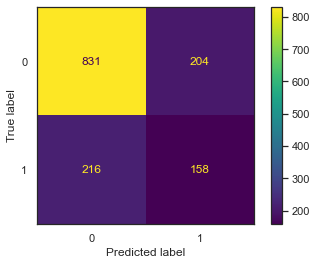

In [86]:
y_train = upsampled.Churn
X_train = upsampled.drop('Churn', axis=1)

# Fixer les valeurs des hyperparamètres à tester
p_k=[1,5,10,15,20,25]
param_grid_Knn = {'n_neighbors':[1,5,10,15,20,25]}

score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid_Knn,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train,y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)
final_model_Knn = clf.best_estimator_
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )
y_prediction_KNN = final_model_Knn.predict(X_test)


result1 = classification_report(y_test, y_prediction_KNN)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_prediction_KNN)
print("Precision globale Accuracy score :",)
print(result2)
print("Matrice de confusion:")
plot_confusion_matrix(final_model_Knn, X_test,y_test)

## Resampling techniques — Undersample majority class
Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [87]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
no_churn_downsampled = resample(not_churn,
                                replace = False, # sample without replacement
                                n_samples = len(churn_), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_churn_downsampled, churn_])

# checking counts
downsampled.Churn.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 20}
Résultats de la validation croisée :
accuracy = 0.666 (+/-0.068) for {'n_neighbors': 1}
accuracy = 0.710 (+/-0.043) for {'n_neighbors': 5}
accuracy = 0.730 (+/-0.032) for {'n_neighbors': 10}
accuracy = 0.724 (+/-0.032) for {'n_neighbors': 15}
accuracy = 0.731 (+/-0.033) for {'n_neighbors': 20}
accuracy = 0.727 (+/-0.041) for {'n_neighbors': 25}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1035
           1       0.48      0.83      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.71      0.73      1409

Precision globale Accuracy score :
0.7146912704045423
Matrice de confusion:


C:\Users\houss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


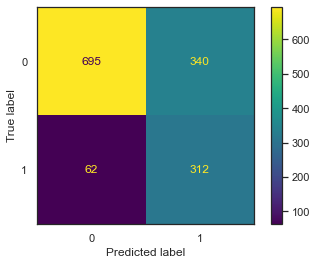

In [88]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Churn
X_train = downsampled.drop('Churn', axis=1)
# Fixer les valeurs des hyperparamètres à tester
p_k=[1,5,10,15,20,25]
param_grid_Knn = {'n_neighbors':[1,5,10,15,20,25]}

score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid_Knn,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train,y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)
final_model_Knn = clf.best_estimator_
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )
y_prediction_KNN = final_model_Knn.predict(X_test)


result1 = classification_report(y_test, y_prediction_KNN)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_prediction_KNN)
print("Precision globale Accuracy score :",)
print(result2)
print("Matrice de confusion:")
plot_confusion_matrix(final_model_Knn, X_test,y_test)

## 4- Comparison

Comparing the metrics of the two techniques using the "KNN" algorithm, the second technique "Resampling techniques — Undersample majority class" is better than the first technique of "Oversample minority class", seeing the Accuracy, 0.71 when the Oversample minority class has 0.7 as accuracy, and in our case, false negatives are costly:

the precision of negative class in the 2nd technique is = 0.92 VS 0.79 for the 1st technique.
the precision of positive class in the 2nd technique is = 0.48 VS 0.44 for the 1st technique



## 5- Conclusion:
We dont have an optimal technique but regarding to the cost of the false negative so we will choose the second technique which is less costly than the first